In [2]:
import numpy as np

# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, ClassicalRegister, transpile, Aer, IBMQ
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
from qiskit.providers.aer import QasmSimulator

# Loading your IBM Quantum account(s)
provider = IBMQ.load_account()

ibmqfactory.load_account:WARNING:2022-04-19 19:43:03,747: Credentials are already in use. The existing account in the session will be replaced.


## multi-controlled-Toffoli (MCT)
This gate is mentioned in the paper. Has a function in Qiskit. "controlled-controlled-not" gate. Takes three qubit inputs if the first two are 1 inverts the third otherwise everything stays the same.

It appreas they build the circuit with elementary gates and with the MCT gates
Describes the 

This is the function:
mct(self, q_controls, q_target, q_ancilla, mode='basic')
self (QuantumCircuit) -- The QuantumCircuit object to apply the mct gate on.

q_controls (Union(QuantumRegister, list[Qubit])) -- The list of control qubits

q_target (Qubit) -- The target qubit

q_ancilla (Union(QuantumRegister, list[Qubit])) -- The list of ancillary qubits

mode (str) -- The implementation mode to use

## Notes about the paper
the discrete OQRW is considered
Algorithm contains
walker
coin
evolution operators including coin and shift operators
operation performed without measurement (measurement only performed at the end)



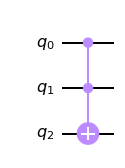

In [92]:
## The Toffoli gate
qc = QuantumCircuit(3)
a = 0
b = 1
t = 2
# Toffoli with control qubits a and b and target t
qc.ccx(a,b,t)
qc.draw()

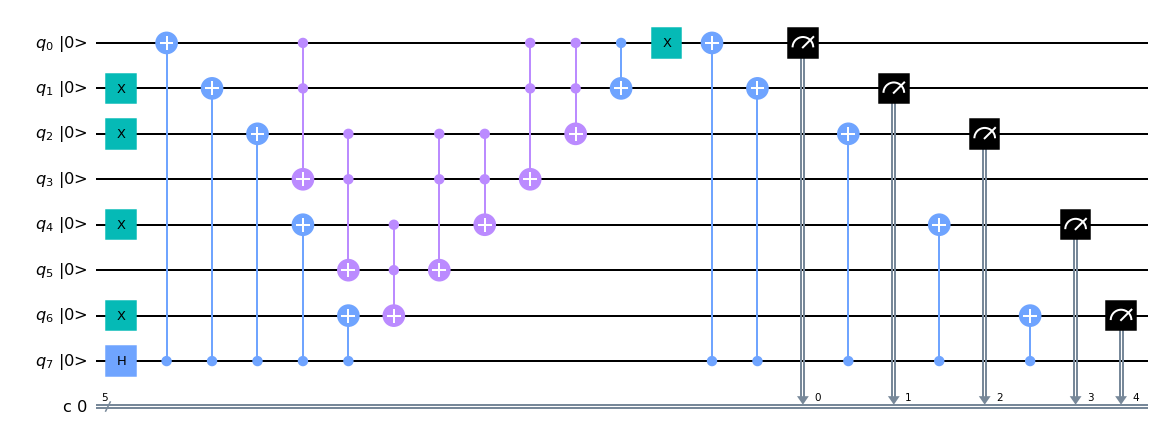

In [2]:
## construct the circuit from the paper
## Coin and shift operators for walking on the number line with five-position states (Figure 4)
## from the paper
# MAY NEED TO FIX THE INITIAL STATES HERE

## this is the 5 qubit circuit for the simulator
qc = QuantumCircuit(8, 5)

# labelling the qubits
q0 = 0
q1 = 1
q2 = 2
c0 = 3
q3 = 4
c1 = 5
q4 = 6
c = 7

# add the gates to put the qubits in the initial states later

# set the initial states |01111>
# check that this initial state is set correctly
qc.h(c)
qc.x(q1)
qc.x(q2)
qc.x(q3)
qc.x(q4)

qc.cx(c, q0)
qc.cx(c, q1)
qc.cx(c, q2)
qc.cx(c, q3)
qc.cx(c, q4)

# this part can be replaced by the MCT gate
qc.ccx(q0, q1, c0)
qc.ccx(q2, c0, c1)
qc.ccx(q3, c1, q4)
qc.ccx(q2, c0, c1)
qc.ccx(q2, c0, q3)
# end of the part that can be replaced by the MCT gate

qc.ccx(q0, q1, c0)
qc.ccx(q0, q1, q2)
qc.cx(q0, q1)
qc.x(q0)
qc.cx(c, q0)
qc.cx(c, q1)
qc.cx(c, q2)
qc.cx(c, q3)
qc.cx(c, q4)

qc.measure([q0, q1, q2, q3, q4], [0, 1, 2, 3, 4])

qc.draw('mpl', initial_state = True)

In [5]:
qc.depth()

19

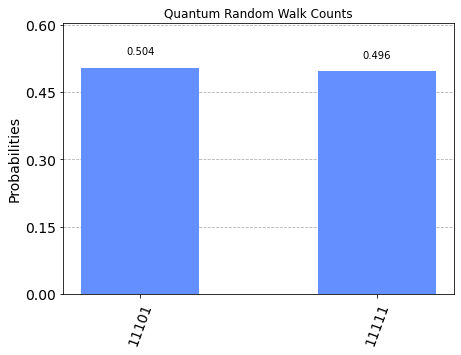

In [102]:
simulator = Aer.get_backend('aer_simulator')

qc = transpile(qc, simulator)

# Run and get counts
result = simulator.run(qc).result()
counts = result.get_counts(qc)
plot_histogram(counts, title='Quantum Random Walk Counts')

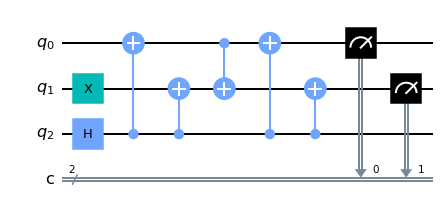

In [3]:
# this is probably not right
# this is probably not right
qc = QuantumCircuit(3, 2)
q0 = 0
q1 = 1
c = 2

qc.h(c)

# set initial state of this qubit
qc.x(q1)
qc.cx(c, q0)
qc.cx(c, q1)
qc.cx(q0, q1)
qc.cx(c, q0)
qc.cx(c, q1)
qc.measure([q0, q1], [0, 1])

qc.draw()

In [4]:
# find the circuit depth
qc.depth()

7

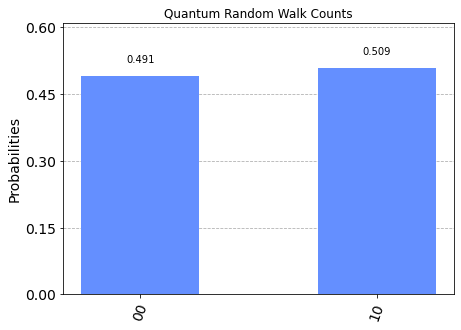

In [5]:
# this is the results from the paper
simulator = Aer.get_backend('aer_simulator')

qc = transpile(qc, simulator)

# Run and get counts
result = simulator.run(qc).result()
counts = result.get_counts(qc)
plot_histogram(counts, title='Quantum Random Walk Counts')